# Cargue de datos

Importamos las librerias

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
import pickle

Cargamos los datos

In [4]:
ratings = pd.read_csv('ml-latest-small/ratings.csv')
movies = pd.read_csv('ml-latest-small/movies.csv')
tags = pd.read_csv('ml-latest-small/tags.csv')
links = pd.read_csv('ml-latest-small/links.csv')

# Analisis exploratorio

Inspección Inicial de los Datos

In [17]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [14]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [15]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [16]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


 Estadísticas Descriptivas

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


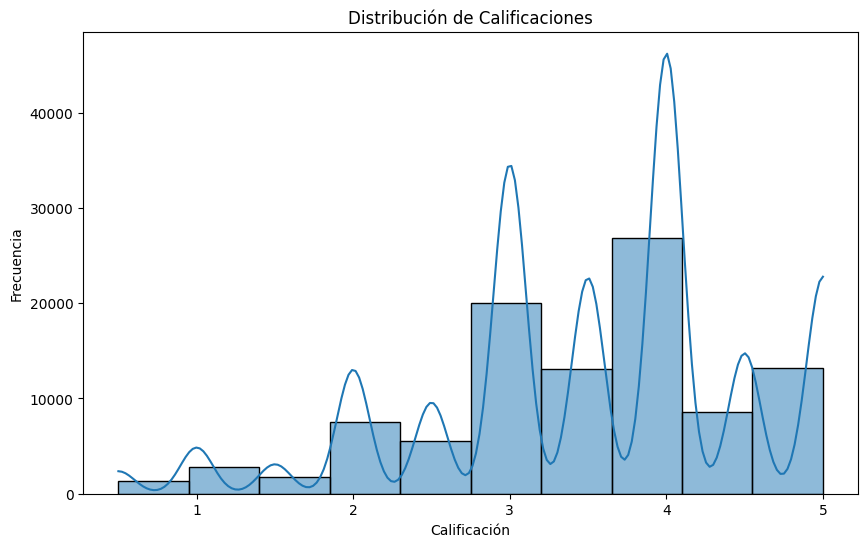

In [20]:
# Estadísticas descriptivas de las calificaciones
print(ratings['rating'].describe())

# Distribución de las calificaciones
plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=10, kde=True)
plt.title('Distribución de Calificaciones')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.show()

Análisis de Géneros

Géneros únicos: ['Adventure' 'Animation' 'Children' 'Comedy' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Mystery' 'Sci-Fi' 'War' 'Musical'
 'Documentary' 'IMAX' 'Western' 'Film-Noir' '(no genres listed)']
Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64


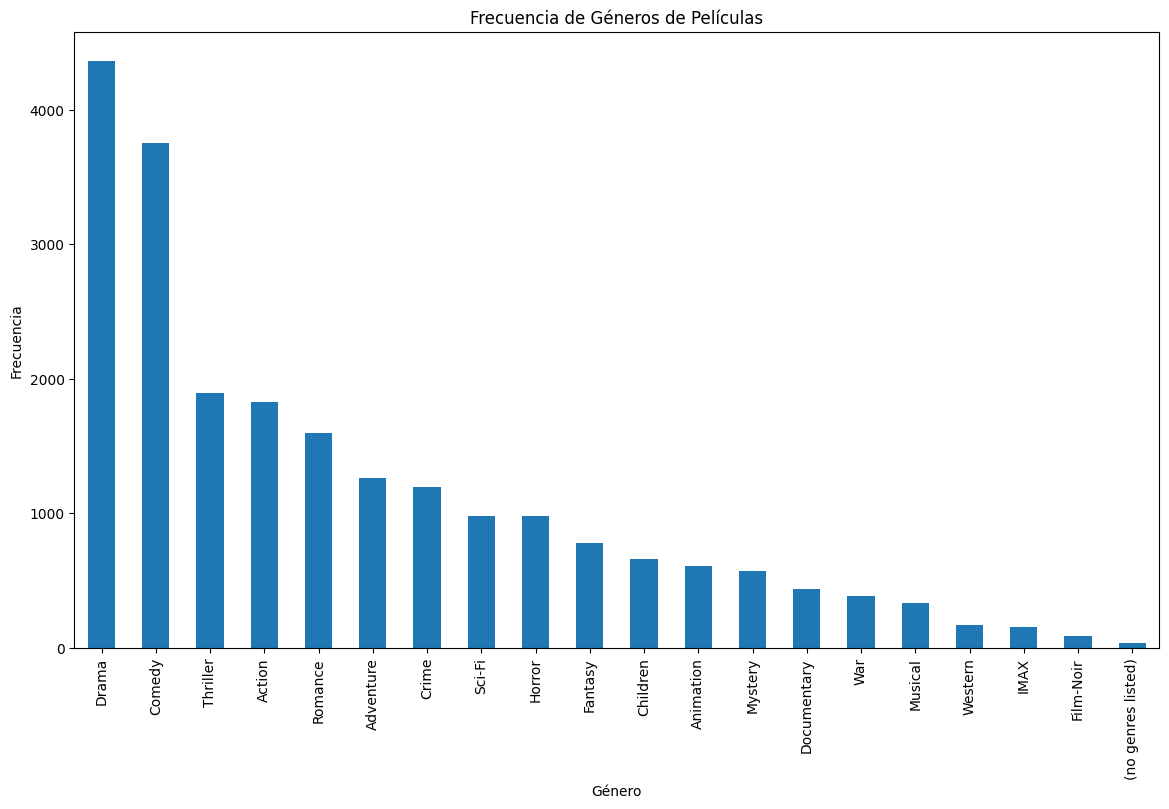

In [21]:
# Extraer todos los géneros únicos
genres = movies['genres'].str.split('|', expand=True).stack().unique()
print(f"Géneros únicos: {genres}")

# Contar la frecuencia de cada género
genre_count = movies['genres'].str.get_dummies(sep='|').sum().sort_values(ascending=False)
print(genre_count)

# Gráfico de barras de la frecuencia de géneros
plt.figure(figsize=(14, 8))
genre_count.plot(kind='bar')
plt.title('Frecuencia de Géneros de Películas')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

# Entrenamiento del modelo

Definimos los rangos de valores de los datos

In [28]:
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

Definimos los datos de test y de train


In [29]:
trainset, testset = train_test_split(data, test_size=0.3)

SVD es una técnica de factorización de matrices utilizada en sistemas de recomendación. Es especialmente conocida por su uso en la descomposición de la matriz de calificaciones en matrices más pequeñas y manejables, lo que permite realizar recomendaciones de manera más eficiente.   
Durante el entrenamiento, el algoritmo SVD aprende las características latentes de los usuarios y las películas para poder predecir calificaciones para las películas que los usuarios aún no han visto.

In [30]:
algo = SVD()
algo.fit(trainset)

In [34]:
algo = SVD()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=50, verbose=False)

{'test_rmse': array([0.86011657, 0.86156895, 0.86139586, 0.8691184 , 0.84794148,
        0.8929278 , 0.84955437, 0.89138635, 0.86987438, 0.87025896,
        0.86248698, 0.86182537, 0.85124115, 0.8771901 , 0.86145424,
        0.84900292, 0.84136278, 0.89189038, 0.86570915, 0.84679955,
        0.86743976, 0.84273332, 0.86668777, 0.86620264, 0.8697639 ,
        0.88335506, 0.87113901, 0.84950232, 0.876416  , 0.86447402,
        0.85270173, 0.88335456, 0.84465993, 0.86104587, 0.84679653,
        0.84503608, 0.86949668, 0.86544917, 0.88859909, 0.85519285,
        0.86097295, 0.86381199, 0.86080354, 0.86861654, 0.87449519,
        0.85000092, 0.89246636, 0.89222282, 0.8666823 , 0.87387432]),
 'test_mae': array([0.66211443, 0.66068495, 0.66471331, 0.66517528, 0.6519362 ,
        0.68693086, 0.65287359, 0.68274596, 0.66578313, 0.66618251,
        0.66575036, 0.66195415, 0.65901695, 0.67041635, 0.66208784,
        0.65285942, 0.64529344, 0.68238925, 0.65456549, 0.65359839,
        0.66305902, 0

In [35]:
rmse = accuracy.rmse(algo.test(testset))
RMSE: {rmse}

RMSE: 0.6401


In [36]:
with open('svd_model.pkl', 'wb') as model_file:
    pickle.dump(algo, model_file)